In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv("diabetes.csv")

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.shape

(768, 9)

In [6]:
dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

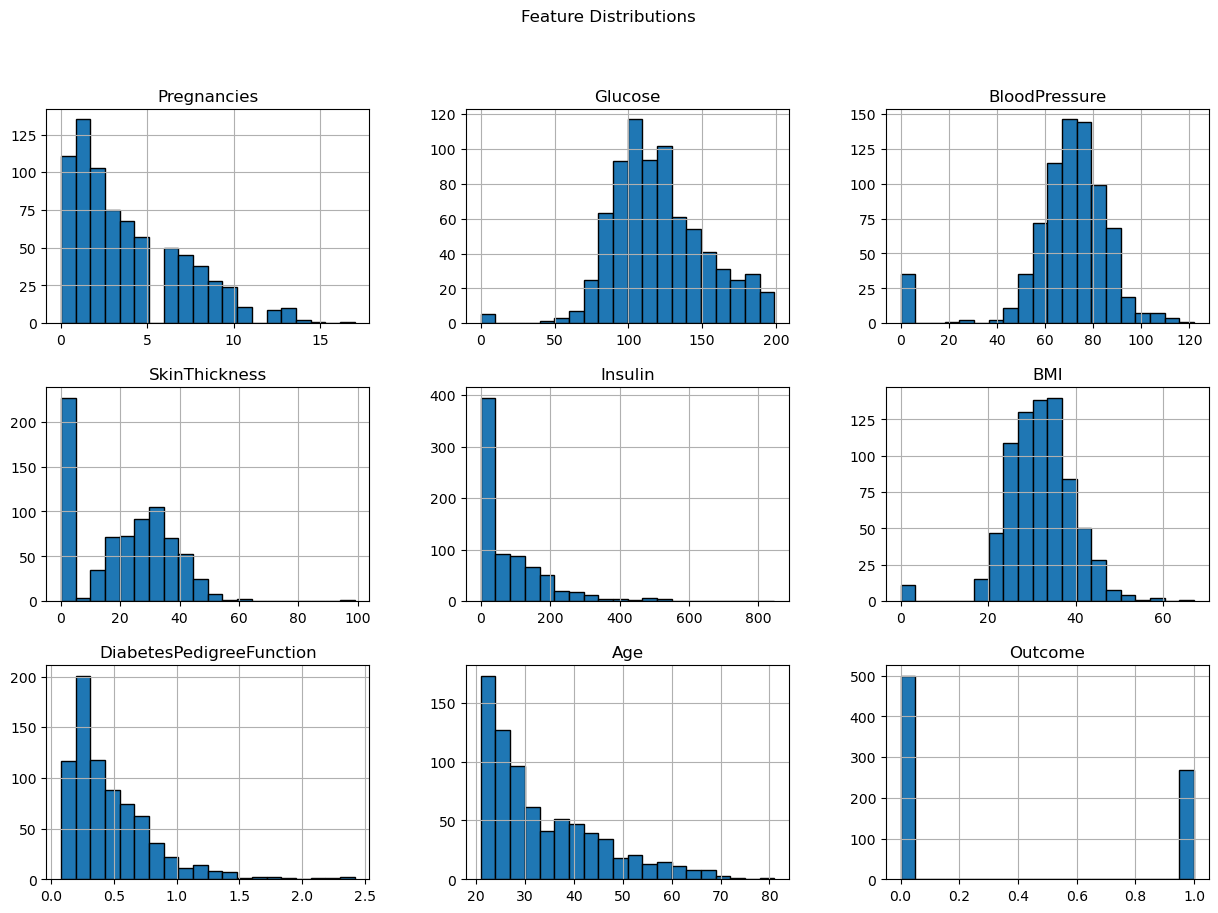

In [8]:
dataset.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

In [9]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
scaler=StandardScaler()
standardized_X=scaler.fit_transform(X)

In [12]:
standardized_X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [13]:
x_train,x_test,y_train,y_test=train_test_split(standardized_X,Y,test_size=0.2,stratify=Y,random_state=42)

In [14]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [15]:
train_prediction=model.predict(x_train)

In [16]:
train_accuracy=accuracy_score(train_prediction,y_train)

In [17]:
print("Accuracy on Training Data: ",train_accuracy)

Accuracy on Training Data:  1.0


In [18]:
test_prediction=model.predict(x_test)

In [19]:
test_accuracy=accuracy_score(test_prediction,y_test)

In [20]:
print("Accuracy on Testing Data: ",test_accuracy)

Accuracy on Testing Data:  0.7727272727272727
